#Introduction

#Background

New Haven is a coastal city in Connecticut state, US. New Haven is the home of Yale University. Yale University is a prestigious university which attracts students from the whole world. New Haven's population is diverse and it has always been known as a city of immigrants. Also, New Haven was named as the best foodie city in US with diverse ethnic restaurants.

#Buisness problem:

As New Haven's population is diverse with large number of international students, so opening an ethnic restaurant could be a profitable buisness. At this project, we are exploring New Haven City to find the best place to open a Mexican restaurant. We are looking for a place with high Hispanic population and high income rate.

#Data sources

1- We have got New Haven neighborhood demographic data from [DataHaven](https://www.ctdatahaven.org/data-resources/new-haven-neighborhood-profile-csv-2016-5y). We will use data to get the hispanic rate and income rate for each neighborhood. Also, we will use it to get the neighborhood coordinates.

2-We will use Foursquare app to explore places in the neighborhood, then clustering them.

In [3]:
#Install python libraries

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import json
import requests
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
!conda install -c conda-forge folium=0.5.0 --yes
import folium
from bs4 import BeautifulSoup #for web scraping
import lxml
print("libraries are imported")

Solving environment: ...working... done

# All requested packages already installed.



C:\Users\12035\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Solving environment: ...working... done

# All requested packages already installed.

libraries are imported


In [4]:
#Data Preparation

In [5]:
#import New Haven demographic dataset

NH_dat = pd.read_csv('Documents/NH_neighborhood.csv')
NH_dat.head()

,Neighborhood,Total population,Population ages 0-17,"% of total population, ages 0-17",Population ages 65+,"% of total population, ages 65+",Hispanic population,"% of total population, Hispanic",White non-Hispanic population,"% of total population, white non-Hispanic",Black non-Hispanic population,"% of total population, black non-Hispanic",Other race non-Hispanic population,"% of total population, other race non-Hispanic",Total households,Owner-occupied households,Homeownership rate,"Total population, poverty status determined",Population in poverty,Poverty rate,Population low-income,Low-income rate,Population high income (5xFPL),High-income rate,Foreign-born population,"% of total population, foreign-born","Population ages 0-17, poverty status determined",Population ages 0-17 in poverty,"Population ages 0-17, poverty rate",Population ages 0-17 low-income,"Population ages 0-17, low-income rate","Population ages 65+, poverty status determined",Population ages 65+ in poverty,"Population ages 65+, poverty rate",Population ages 65+ low-income,"Population ages 65+, low-income rate"
0,Amity,4970,1327,0.267,479,0.096,669,0.135,1090,0.219,2716,0.546,495,0.100,1830,839,0.458,4970,1033,0.208,2140,0.431,1067,0.215,631,0.127,1327,397,0.299,709,0.534,479,112,0.234,215,0.449
1,Annex,6677,1557,0.233,692,0.104,3073,0.460,1915,0.287,1401,0.210,288,0.043,2432,896,0.368,6610,1728,0.261,2984,0.451,914,0.138,1627,0.244,1490,635,0.426,985,0.661,692,171,0.247,303,0.438
2,Beaver Hills,5135,1443,0.281,580,0.113,724,0.141,750,0.146,3374,0.657,287,0.056,2012,916,0.455,5135,969,0.189,2277,0.443,1088,0.239,399,0.087,1232,252,0.205,650,0.528,538,56,0.104,118,0.219
3,Dixwell,4962,1034,0.208,610,0.123,658,0.133,794,0.160,3272,0.659,238,0.048,1808,288,0.159,4145,1264,0.305,2348,0.566,526,0.127,368,0.074,1027,501,0.488,882,0.859,585,83,0.142,333,0.569
4,Downtown,10935,378,0.035,551,0.050,1209,0.111,6134,0.561,1216,0.111,2376,0.217,4342,408,0.094,6848,1518,0.222,2488,0.363,2110,0.306,2500,0.227,354,124,0.350,137,0.387,542,52,0.096,210,0.388


In [6]:
#Create address column by adding City, state, country to neighborhood
NH_dat['Address'] =  NH_dat['Neighborhood'].astype(str) + ', New Haven, CT, US'
NH_dat.head()

,Neighborhood,Total population,Population ages 0-17,"% of total population, ages 0-17",Population ages 65+,"% of total population, ages 65+",Hispanic population,"% of total population, Hispanic",White non-Hispanic population,"% of total population, white non-Hispanic",Black non-Hispanic population,"% of total population, black non-Hispanic",Other race non-Hispanic population,"% of total population, other race non-Hispanic",Total households,Owner-occupied households,Homeownership rate,"Total population, poverty status determined",Population in poverty,Poverty rate,Population low-income,Low-income rate,Population high income (5xFPL),High-income rate,Foreign-born population,"% of total population, foreign-born","Population ages 0-17, poverty status determined",Population ages 0-17 in poverty,"Population ages 0-17, poverty rate",Population ages 0-17 low-income,"Population ages 0-17, low-income rate","Population ages 65+, poverty status determined",Population ages 65+ in poverty,"Population ages 65+, poverty rate",Population ages 65+ low-income,"Population ages 65+, low-income rate",Address
0,Amity,4970,1327,0.267,479,0.096,669,0.135,1090,0.219,2716,0.546,495,0.100,1830,839,0.458,4970,1033,0.208,2140,0.431,1067,0.215,631,0.127,1327,397,0.299,709,0.534,479,112,0.234,215,0.449,"Amity, New Haven, CT, US"
1,Annex,6677,1557,0.233,692,0.104,3073,0.460,1915,0.287,1401,0.210,288,0.043,2432,896,0.368,6610,1728,0.261,2984,0.451,914,0.138,1627,0.244,1490,635,0.426,985,0.661,692,171,0.247,303,0.438,"Annex, New Haven, CT, US"
2,Beaver Hills,5135,1443,0.281,580,0.113,724,0.141,750,0.146,3374,0.657,287,0.056,2012,916,0.455,5135,969,0.189,2277,0.443,1088,0.239,399,0.087,1232,252,0.205,650,0.528,538,56,0.104,118,0.219,"Beaver Hills, New Haven, CT, US"
3,Dixwell,4962,1034,0.208,610,0.123,658,0.133,794,0.160,3272,0.659,238,0.048,1808,288,0.159,4145,1264,0.305,2348,0.566,526,0.127,368,0.074,1027,501,0.488,882,0.859,585,83,0.142,333,0.569,"Dixwell, New Haven, CT, US"
4,Downtown,10935,378,0.035,551,0.050,1209,0.111,6134,0.561,1216,0.111,2376,0.217,4342,408,0.094,6848,1518,0.222,2488,0.363,2110,0.306,2500,0.227,354,124,0.350,137,0.387,542,52,0.096,210,0.388,"Downtown, New Haven, CT, US"


In [7]:
#Get address coordinates
from geopy.extra.rate_limiter import RateLimiter
locator = Nominatim(user_agent="to_explorer")
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
NH_dat['location'] = NH_dat['Address'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
NH_dat['point'] = NH_dat['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
NH_dat[['latitude', 'longitude', 'altitude']] = pd.DataFrame(NH_dat['point'].tolist(), index=NH_dat.index)
NH_dat.shape
NH_dat.head()

,Neighborhood,Total population,Population ages 0-17,"% of total population, ages 0-17",Population ages 65+,"% of total population, ages 65+",Hispanic population,"% of total population, Hispanic",White non-Hispanic population,"% of total population, white non-Hispanic",Black non-Hispanic population,"% of total population, black non-Hispanic",Other race non-Hispanic population,"% of total population, other race non-Hispanic",Total households,Owner-occupied households,Homeownership rate,"Total population, poverty status determined",Population in poverty,Poverty rate,Population low-income,Low-income rate,Population high income (5xFPL),High-income rate,Foreign-born population,"% of total population, foreign-born","Population ages 0-17, poverty status determined",Population ages 0-17 in poverty,"Population ages 0-17, poverty rate",Population ages 0-17 low-income,"Population ages 0-17, low-income rate","Population ages 65+, poverty status determined",Population ages 65+ in poverty,"Population ages 65+, poverty rate",Population ages 65+ low-income,"Population ages 65+, low-income rate",Address,location,point,latitude,longitude,altitude
0,Amity,4970,1327,0.267,479,0.096,669,0.135,1090,0.219,2716,0.546,495,0.100,1830,839,0.458,4970,1033,0.208,2140,0.431,1067,0.215,631,0.127,1327,397,0.299,709,0.534,479,112,0.234,215,0.449,"Amity, New Haven, CT, US","(Amity, New Haven, New Haven County, Connectic...","(41.3321709, -72.9775623, 0.0)",41.332171,-72.977562,0.0
1,Annex,6677,1557,0.233,692,0.104,3073,0.460,1915,0.287,1401,0.210,288,0.043,2432,896,0.368,6610,1728,0.261,2984,0.451,914,0.138,1627,0.244,1490,635,0.426,985,0.661,692,171,0.247,303,0.438,"Annex, New Haven, CT, US","(Annex, New Haven, New Haven County, Connectic...","(41.2922718, -72.8942314, 0.0)",41.292272,-72.894231,0.0
2,Beaver Hills,5135,1443,0.281,580,0.113,724,0.141,750,0.146,3374,0.657,287,0.056,2012,916,0.455,5135,969,0.189,2277,0.443,1088,0.239,399,0.087,1232,252,0.205,650,0.528,538,56,0.104,118,0.219,"Beaver Hills, New Haven, CT, US","(Beaver Hills, New Haven, New Haven County, Co...","(41.3245035, -72.9460944, 0.0)",41.324503,-72.946094,0.0
3,Dixwell,4962,1034,0.208,610,0.123,658,0.133,794,0.160,3272,0.659,238,0.048,1808,288,0.159,4145,1264,0.305,2348,0.566,526,0.127,368,0.074,1027,501,0.488,882,0.859,585,83,0.142,333,0.569,"Dixwell, New Haven, CT, US","(Dixwell, New Haven, New Haven County, Connect...","(41.3187009, -72.9351083, 0.0)",41.318701,-72.935108,0.0
4,Downtown,10935,378,0.035,551,0.050,1209,0.111,6134,0.561,1216,0.111,2376,0.217,4342,408,0.094,6848,1518,0.222,2488,0.363,2110,0.306,2500,0.227,354,124,0.350,137,0.387,542,52,0.096,210,0.388,"Downtown, New Haven, CT, US","(Downtown, New Haven, New Haven County, Connec...","(41.308647, -72.9268224, 0.0)",41.308647,-72.926822,0.0


Dwight longitude and latitude information is missing, so I will add them manually

In [8]:
NH_dat.at[5, 'latitude' ] = 41.3119
NH_dat.at[5, 'longitude'] = -72.9387

In [9]:
#select target column and convert string columns to floats

NH_dat = NH_dat[['Neighborhood', '% of total population, Hispanic', 'Low-income rate', 'Address', 'location', 'latitude', 'longitude']]
NH_dat['% of total population, Hispanic'] = (NH_dat['% of total population, Hispanic']).astype(float)
NH_dat['Low-income rate'] = (NH_dat['Low-income rate']).astype(float)
NH_dat['latitude'].apply(lambda x: float(x))
NH_dat['longitude'].apply(lambda x: float(x))

0    -72.977562
1    -72.894231
2    -72.946094
3    -72.935108
4    -72.926822
5    -72.938700
6    -72.904333
7    -72.899315
8    -72.947320
9    -72.895657
10   -72.878786
11   -72.940533
12   -72.934532
13   -72.921952
14   -72.875013
15   -72.976598
16   -72.961132
17   -72.974906
18   -72.916347
19   -72.925052
20   -72.934083
Name: longitude, dtype: float64

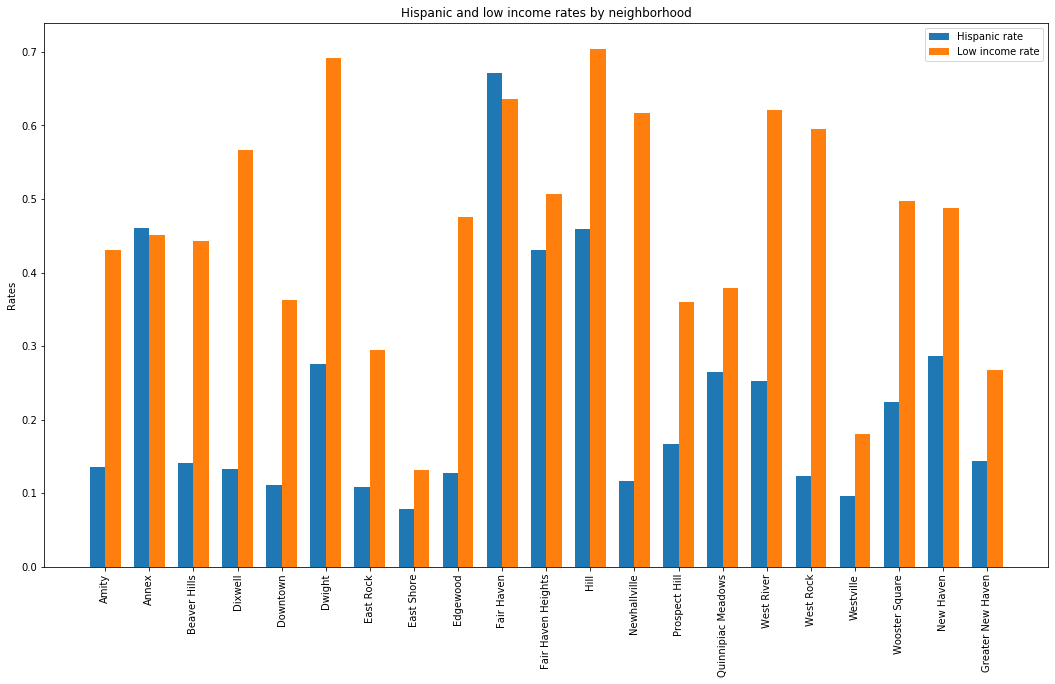

In [10]:
Hispanic_rate = NH_dat['% of total population, Hispanic']
Neighborhood = NH_dat['Neighborhood']
Lowincome_rate = NH_dat['Low-income rate']

x = np.arange(len(Neighborhood))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Hispanic_rate, width, label='Hispanic rate')
rects2 = ax.bar(x + width/2, Lowincome_rate, width, label='Low income rate')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rates')
ax.set_title('Hispanic and low income rates by neighborhood')
ax.set_xticks(x)
ax.set_xticklabels(Neighborhood)
ax.legend()

fig.set_size_inches(18, 10, forward=True)
plt.xticks(rotation=90)
plt.show()


We can observe from the graph that fair haven has the highest hispanic rate with realtively high low income rate. In general, neighborhoods with high hispanic rate have high low income rate as well.  Now I will categorize hispanic rate to high (0.4:0.7), moderate (0.2:0.4), low (< 0.2) as well as I will add column for categories colors

In [11]:
def Hispanic_cat (row):
   if row['% of total population, Hispanic'] >= 0.4 :
      return 'High'
   if row['% of total population, Hispanic'] >= 0.2 :
      return 'moderate'
   if row['% of total population, Hispanic'] < 0.2 :
      return 'low'
      return 'other'
NH_dat['Hispanic_cat'] = NH_dat.apply (lambda row: Hispanic_cat(row), axis=1)
NH_dat.head()

,Neighborhood,"% of total population, Hispanic",Low-income rate,Address,location,latitude,longitude,Hispanic_cat
0,Amity,0.135,0.431,"Amity, New Haven, CT, US","(Amity, New Haven, New Haven County, Connectic...",41.332171,-72.977562,low
1,Annex,0.460,0.451,"Annex, New Haven, CT, US","(Annex, New Haven, New Haven County, Connectic...",41.292272,-72.894231,High
2,Beaver Hills,0.141,0.443,"Beaver Hills, New Haven, CT, US","(Beaver Hills, New Haven, New Haven County, Co...",41.324503,-72.946094,low
3,Dixwell,0.133,0.566,"Dixwell, New Haven, CT, US","(Dixwell, New Haven, New Haven County, Connect...",41.318701,-72.935108,low
4,Downtown,0.111,0.363,"Downtown, New Haven, CT, US","(Downtown, New Haven, New Haven County, Connec...",41.308647,-72.926822,low


In [12]:
def Hispanic_cat_col (row):
   if row['Hispanic_cat'] == 'High' :
      return 'red'
   if row['Hispanic_cat'] == "moderate" :
      return 'green'
   if row['Hispanic_cat'] == 'low' :
      return 'blue'
      return 'other'
NH_dat['Hispanic_cat_col'] = NH_dat.apply (lambda row: Hispanic_cat_col(row), axis=1)
NH_dat.head()

,Neighborhood,"% of total population, Hispanic",Low-income rate,Address,location,latitude,longitude,Hispanic_cat,Hispanic_cat_col
0,Amity,0.135,0.431,"Amity, New Haven, CT, US","(Amity, New Haven, New Haven County, Connectic...",41.332171,-72.977562,low,blue
1,Annex,0.460,0.451,"Annex, New Haven, CT, US","(Annex, New Haven, New Haven County, Connectic...",41.292272,-72.894231,High,red
2,Beaver Hills,0.141,0.443,"Beaver Hills, New Haven, CT, US","(Beaver Hills, New Haven, New Haven County, Co...",41.324503,-72.946094,low,blue
3,Dixwell,0.133,0.566,"Dixwell, New Haven, CT, US","(Dixwell, New Haven, New Haven County, Connect...",41.318701,-72.935108,low,blue
4,Downtown,0.111,0.363,"Downtown, New Haven, CT, US","(Downtown, New Haven, New Haven County, Connec...",41.308647,-72.926822,low,blue


In [13]:
##Create map of New Haven Neighborhood colored by Hispanic rate: red (high), green(moderate), blue (low)

In [14]:
latitude = NH_dat['latitude'].tolist()
longitude = NH_dat['longitude'].tolist()
map_NH = folium.Map(location=[latitude[0], longitude[0]], zoom_start=10)
 
# add markers to map
for lat, lng, neighborhood, hispanic_rate, col in zip(NH_dat['latitude'], NH_dat['longitude'], NH_dat['Neighborhood'], NH_dat['% of total population, Hispanic'],NH_dat['Hispanic_cat_col']):
    label = '{}, {}'.format(neighborhood, hispanic_rate)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=col,
        fill_opacity=0.7,
        parse_html=False).add_to(map_NH)  
    
map_NH

As we can observe from the map or the barplot, the neighborhoods with high hispanic rate are Fair Haven, Fair Haven Hights, Annex and Hill and the neighborhoods with moderate hispanic rate are Wooster Square, Dwight, Quinnipiac Meadows, New Haven and West River.

##Exploring neighborhoods with high and moderate hispanic rate using foursquare

In [15]:
#add foursquare credentials
CLIENT_ID = 'TSDFFOYNSJ2KCLH5ORQNE1PJ0IKEQZFBDHOJSCYIOA2XS1PH'
CLIENT_SECRET = 'JAIXSDEU0SHMVWHJDDK3XIZB42T135PLABMRTGSXZBZO4FQ2' 
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TSDFFOYNSJ2KCLH5ORQNE1PJ0IKEQZFBDHOJSCYIOA2XS1PH
CLIENT_SECRET:JAIXSDEU0SHMVWHJDDK3XIZB42T135PLABMRTGSXZBZO4FQ2


In [16]:
#Subsetting Neighborhood with high and moderate hispanic rate
His_nei = NH_dat[(NH_dat["Hispanic_cat"] == "High") | (NH_dat["Hispanic_cat"] == "moderate")]
His_nei = His_nei[['Neighborhood', 'Hispanic_cat', 'Low-income rate', 'latitude', 'longitude']]
His_nei

,Neighborhood,Hispanic_cat,Low-income rate,latitude,longitude
1,Annex,High,0.451,41.292272,-72.894231
5,Dwight,moderate,0.692,41.311900,-72.938700
9,Fair Haven,High,0.636,41.311208,-72.895657
10,Fair Haven Heights,High,0.507,41.308620,-72.878786
11,Hill,High,0.704,41.294648,-72.940533
14,Quinnipiac Meadows,moderate,0.379,41.326245,-72.875013
15,West River,moderate,0.621,41.339734,-72.976598
18,Wooster Square,moderate,0.497,41.304340,-72.916347
19,New Haven,moderate,0.488,41.308214,-72.925052


In [17]:
#Create a function to get the venues of all neighborhoods
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [19]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

NH_venues = getNearbyVenues(names=His_nei['Neighborhood'],
                                   latitudes=His_nei['latitude'],
                                   longitudes=His_nei['longitude']
                                  )

Annex
Dwight
Fair Haven
Fair Haven Heights
Hill
Quinnipiac Meadows
West River
Wooster Square
New Haven


In [20]:
NH_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Annex,41.292272,-72.894231,Scarpellino's,41.293406,-72.897604,Italian Restaurant
1,Annex,41.292272,-72.894231,Fireside,41.290685,-72.894162,Pub
2,Annex,41.292272,-72.894231,Citizens Bank,41.290356,-72.893854,Bank
3,Annex,41.292272,-72.894231,Shell,41.293404,-72.897615,Gas Station
4,Annex,41.292272,-72.894231,Frisco's Pizza,41.290340,-72.895462,Pizza Place
5,Annex,41.292272,-72.894231,sam's food stores,41.293425,-72.897627,Grocery Store
6,Annex,41.292272,-72.894231,Peat Meadow Park,41.291419,-72.890268,Park
7,Annex,41.292272,-72.894231,Morris Cove,41.288347,-72.892938,Smoke Shop
8,Annex,41.292272,-72.894231,Annex Pizza,41.288497,-72.892013,Pizza Place
9,Dwight,41.311900,-72.938700,Tandoor,41.309246,-72.935481,Indian Restaurant


In [21]:
#get the count of venues for each neighborhood
NH_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Annex,9,9,9,9,9,9
Dwight,24,24,24,24,24,24
Fair Haven,18,18,18,18,18,18
Fair Haven Heights,2,2,2,2,2,2
Hill,2,2,2,2,2,2
New Haven,100,100,100,100,100,100
Quinnipiac Meadows,7,7,7,7,7,7
West River,26,26,26,26,26,26
Wooster Square,19,19,19,19,19,19


In [22]:
print('There are {} uniques categories.'.format(len(NH_venues['Venue Category'].unique())))

There are 97 uniques categories.


##Analyzing the neighborhood

In [23]:
# one hot encoding
NH_onehot = pd.get_dummies(NH_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
NH_onehot['Neighborhood'] = NH_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [NH_onehot.columns[-1]] + list(NH_onehot.columns[:-1])
NH_onehot = NH_onehot[fixed_columns]

NH_onehot.head()

,Neighborhood,African Restaurant,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Automotive Shop,Bagel Shop,Bakery,Bank,Bar,Beer Bar,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Butcher,Café,Chaat Place,Cocktail Bar,Coffee Shop,College Auditorium,Concert Hall,Construction & Landscaping,Cosmetics Shop,Creperie,Cuban Restaurant,Deli / Bodega,Dessert Shop,Diner,Discount Store,Donut Shop,Event Space,Farmers Market,Fast Food Restaurant,Flea Market,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Gas Station,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Home Service,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Latin American Restaurant,Martial Arts Dojo,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Monument / Landmark,Movie Theater,Music School,Music Store,Nightclub,Noodle House,North Indian Restaurant,Park,Pet Store,Pharmacy,Pizza Place,Poke Place,Pub,Rental Car Location,Restaurant,Rock Club,Salad Place,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shipping Store,Smoke Shop,Spa,Spanish Restaurant,Sports Bar,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Taco Place,Thai Restaurant,Theater,Thrift / Vintage Store,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Annex,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Annex,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Annex,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Annex,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Annex,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
#get the dimensions of the dataset
NH_onehot.shape

(207, 98)

In [25]:
#group rows with neighborhood
NH_grouped = NH_onehot.groupby('Neighborhood').mean().reset_index()
NH_grouped.head()

,Neighborhood,African Restaurant,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Automotive Shop,Bagel Shop,Bakery,Bank,Bar,Beer Bar,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Butcher,Café,Chaat Place,Cocktail Bar,Coffee Shop,College Auditorium,Concert Hall,Construction & Landscaping,Cosmetics Shop,Creperie,Cuban Restaurant,Deli / Bodega,Dessert Shop,Diner,Discount Store,Donut Shop,Event Space,Farmers Market,Fast Food Restaurant,Flea Market,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Gas Station,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Home Service,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Latin American Restaurant,Martial Arts Dojo,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Monument / Landmark,Movie Theater,Music School,Music Store,Nightclub,Noodle House,North Indian Restaurant,Park,Pet Store,Pharmacy,Pizza Place,Poke Place,Pub,Rental Car Location,Restaurant,Rock Club,Salad Place,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shipping Store,Smoke Shop,Spa,Spanish Restaurant,Sports Bar,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Taco Place,Thai Restaurant,Theater,Thrift / Vintage Store,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Annex,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.111111,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.111111,0.0,0.111111,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.000000,0.222222,0.0,0.111111,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.111111,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Dwight,0.0,0.0,0.0,0.0,0.041667,0.0,0.0,0.041667,0.000000,0.041667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.041667,0.041667,0.000000,0.0,0.0,0.083333,0.0,0.0,0.041667,0.0,0.041667,0.0,0.000000,0.000000,0.0,0.0,0.0,0.041667,0.0,0.041667,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.083333,0.125000,0.0,0.000000,0.041667,0.0,0.0,0.0,0.041667,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.041667,0.0,0.041667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fair Haven,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.111111,0.055556,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.166667,0.0,0.000000,0.000000,0.055556,0.0,0.0,0.055556,0.0,0.0,0.000000,0.0,0.000000,0.0,0.055556,0.055556,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.055556,0.166667,0.0,0.000000,0.000000,0.0,0.0,0.0,0.055556,0.0,0.0,0.055556,0.000000,0.0,0.055556,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Fair Haven Heights,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.5,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.5,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Hill,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.5,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.00000

In [26]:
#get the size of grouped dataset
NH_grouped.shape

(9, 98)

In [27]:
for hood in NH_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = NH_grouped[NH_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(5))

----Annex----
                venue  freq
0         Pizza Place  0.22
1  Italian Restaurant  0.11
2                Bank  0.11
3                Park  0.11
4          Smoke Shop  0.11
----Dwight----
                       venue  freq
0                Pizza Place  0.12
1       Fast Food Restaurant  0.08
2                   Pharmacy  0.08
3  Middle Eastern Restaurant  0.08
4        Rental Car Location  0.04
----Fair Haven----
                  venue  freq
0         Deli / Bodega  0.17
1           Pizza Place  0.17
2                Bakery  0.11
3                   Gym  0.06
4  Fast Food Restaurant  0.06
----Fair Haven Heights----
                        venue  freq
0  Construction & Landscaping   0.5
1                 Golf Course   0.5
2          African Restaurant   0.0
3                 Music Store   0.0
4                         Pub   0.0
----Hill----
                venue  freq
0         Flea Market   0.5
1  Spanish Restaurant   0.5
2  African Restaurant   0.0
3         Music Store   0.

We can observe that spanish restaurant present at Hill neighborhood with freq 0.5 and taco place which is a Mexican restaurant present at West Rever with freq 0.04

In [28]:
#write function to sort venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = NH_grouped['Neighborhood']

for ind in np.arange(NH_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(NH_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Annex,Pizza Place,Pub,Smoke Shop,Park,Italian Restaurant,Grocery Store,Gas Station,Bank,Cuban Restaurant,Deli / Bodega
1,Dwight,Pizza Place,Fast Food Restaurant,Pharmacy,Middle Eastern Restaurant,Storage Facility,Bar,Sandwich Place,Mexican Restaurant,Rental Car Location,Discount Store
2,Fair Haven,Pizza Place,Deli / Bodega,Bakery,Spanish Restaurant,Cosmetics Shop,Sandwich Place,Donut Shop,Shipping Store,Fast Food Restaurant,Pharmacy
3,Fair Haven Heights,Construction & Landscaping,Golf Course,Flea Market,Cuban Restaurant,Deli / Bodega,Dessert Shop,Diner,Discount Store,Donut Shop,Event Space
4,Hill,Flea Market,Spanish Restaurant,Yoga Studio,Cuban Restaurant,Deli / Bodega,Dessert Shop,Diner,Discount Store,Donut Shop,Event Space


##Cluster Neighborhood

In [30]:
kclusters = 5

NH_grouped_clustering = NH_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(NH_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 1, 1, 0, 2, 1, 4, 1, 3])

In [31]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

NH_merged = His_nei

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
NH_merged = NH_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')



# check the last columns!
NH_merged.head()

,Neighborhood,Hispanic_cat,Low-income rate,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Annex,High,0.451,41.292272,-72.894231,3,Pizza Place,Pub,Smoke Shop,Park,Italian Restaurant,Grocery Store,Gas Station,Bank,Cuban Restaurant,Deli / Bodega
5,Dwight,moderate,0.692,41.311900,-72.938700,1,Pizza Place,Fast Food Restaurant,Pharmacy,Middle Eastern Restaurant,Storage Facility,Bar,Sandwich Place,Mexican Restaurant,Rental Car Location,Discount Store
9,Fair Haven,High,0.636,41.311208,-72.895657,1,Pizza Place,Deli / Bodega,Bakery,Spanish Restaurant,Cosmetics Shop,Sandwich Place,Donut Shop,Shipping Store,Fast Food Restaurant,Pharmacy
10,Fair Haven Heights,High,0.507,41.308620,-72.878786,0,Construction & Landscaping,Golf Course,Flea Market,Cuban Restaurant,Deli / Bodega,Dessert Shop,Diner,Discount Store,Donut Shop,Event Space
11,Hill,High,0.704,41.294648,-72.940533,2,Flea Market,Spanish Restaurant,Yoga Studio,Cuban Restaurant,Deli / Bodega,Dessert Shop,Diner,Discount Store,Donut Shop,Event Space


In [32]:
 #create map
latitude = NH_merged['latitude'].tolist()
longitude = NH_merged['longitude'].tolist()
map_clusters = folium.Map(location=[latitude[0], longitude[0]], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(NH_merged['latitude'], NH_merged['longitude'], NH_merged['Neighborhood'], NH_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [2]:
##Examine clusters

In [ ]:
###Cluster 1

In [35]:
NH_merged.loc[NH_merged['Cluster Labels'] == 0, NH_merged.columns[[0] + list(range(2, NH_merged.shape[1]))]]

,Neighborhood,Low-income rate,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Fair Haven Heights,0.507,41.30862,-72.878786,0,Construction & Landscaping,Golf Course,Flea Market,Cuban Restaurant,Deli / Bodega,Dessert Shop,Diner,Discount Store,Donut Shop,Event Space


###Cluster 2

In [33]:
NH_merged.loc[NH_merged['Cluster Labels'] == 1, NH_merged.columns[[0] + list(range(2, NH_merged.shape[1]))]]

,Neighborhood,Low-income rate,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Dwight,0.692,41.311900,-72.938700,1,Pizza Place,Fast Food Restaurant,Pharmacy,Middle Eastern Restaurant,Storage Facility,Bar,Sandwich Place,Mexican Restaurant,Rental Car Location,Discount Store
9,Fair Haven,0.636,41.311208,-72.895657,1,Pizza Place,Deli / Bodega,Bakery,Spanish Restaurant,Cosmetics Shop,Sandwich Place,Donut Shop,Shipping Store,Fast Food Restaurant,Pharmacy
15,West River,0.621,41.339734,-72.976598,1,Bank,Thai Restaurant,Pizza Place,Deli / Bodega,Burger Joint,Butcher,Coffee Shop,Pet Store,Music Store,Martial Arts Dojo
19,New Haven,0.488,41.308214,-72.925052,1,Bar,Sandwich Place,Cocktail Bar,American Restaurant,Pizza Place,Mexican Restaurant,Ice Cream Shop,Burger Joint,Café,Coffee Shop


###Cluster 3

In [36]:
NH_merged.loc[NH_merged['Cluster Labels'] == 2, NH_merged.columns[[0] + list(range(2, NH_merged.shape[1]))]]

,Neighborhood,Low-income rate,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Hill,0.704,41.294648,-72.940533,2,Flea Market,Spanish Restaurant,Yoga Studio,Cuban Restaurant,Deli / Bodega,Dessert Shop,Diner,Discount Store,Donut Shop,Event Space


###Cluster 4

In [37]:
NH_merged.loc[NH_merged['Cluster Labels'] == 3, NH_merged.columns[[0] + list(range(2, NH_merged.shape[1]))]]

,Neighborhood,Low-income rate,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Annex,0.451,41.292272,-72.894231,3,Pizza Place,Pub,Smoke Shop,Park,Italian Restaurant,Grocery Store,Gas Station,Bank,Cuban Restaurant,Deli / Bodega
18,Wooster Square,0.497,41.304340,-72.916347,3,Italian Restaurant,Pizza Place,Farmers Market,Park,Dessert Shop,Thrift / Vintage Store,Automotive Shop,Restaurant,Bakery,Nightclub


###Cluster 5

In [38]:
NH_merged.loc[NH_merged['Cluster Labels'] == 4, NH_merged.columns[[0] + list(range(2, NH_merged.shape[1]))]]

,Neighborhood,Low-income rate,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Quinnipiac Meadows,0.379,41.326245,-72.875013,4,Movie Theater,Construction & Landscaping,Home Service,Restaurant,Jewelry Store,Diner,Donut Shop,Yoga Studio,Deli / Bodega,Dessert Shop
